In [14]:
import xarray as xr
import pandas as pd
import requests, dotenv, os, glob

Load environment

In [2]:
dotenv.load_dotenv()
username = os.environ["AVISO_USERNAME"]
password = os.environ["AVISO_PASSWORD"]

Create opendap url

In [3]:
url_base = 'http://tds.aviso.altimetry.fr/thredds/dodsC/dataset-duacs-experimental-dt-phy-grids-dynamic-interpolation/version_01_00/gulfstream/'
url = f"{url_base}dt_gulfstream_allsat_phy_l4_20200331_20210204.nc"

Xarray link for opening password-protected opendap files
https://docs.xarray.dev/en/stable/user-guide/io.html

In [4]:
session = requests.Session()
session.auth = (username, password)
store = xr.backends.PydapDataStore.open(url, session=session)
ds = xr.open_dataset(store)
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 159, nv: 2, longitude: 455)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-31
  * latitude   (latitude) float32 30.12 30.25 30.38 30.5 ... 49.62 49.75 49.88
  * longitude  (longitude) float32 278.1 278.2 278.4 278.5 ... 334.6 334.8 334.9
  * nv         (nv) int32 0 1
Data variables:
    crs        int32 ...
    lat_bnds   (latitude, nv) float32 ...
    lon_bnds   (longitude, nv) float32 ...
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
Attributes: (12/43)
    _NCProperties:                   version=1|netcdflibversion=4.4.1.1|hdf5l...
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         aviso@altimetry.fr
    ...                              ...
    summary:                         CLS Delayed-Time Level-4 sea surface hei...
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Gulfstream Exte...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-03-31T12:00:00Z
    time_coverage_start:             2020-03-30T12:00:00Z

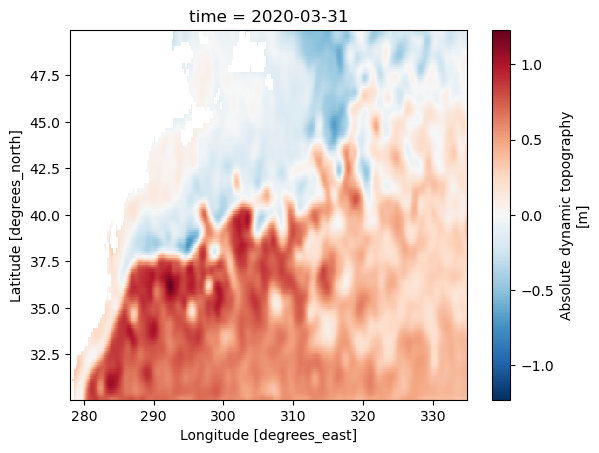

In [5]:
ds.adt.plot()

[]

In [10]:
base_url = "http://example.com/opendap/"
file_names = ["file1.nc", "file2.nc", "file3.nc"]

# Create a list of complete URLs
url_list = [base_url + file_name for file_name in file_names]

# Convert the list of URLs to a single string
url_string = "\n".join(url_list)

# Print or use the url_string as needed
print(url_string)


http://example.com/opendap/file1.nc
http://example.com/opendap/file2.nc
http://example.com/opendap/file3.nc


In [11]:
url_list

['http://example.com/opendap/file1.nc',
 'http://example.com/opendap/file2.nc',
 'http://example.com/opendap/file3.nc']

In [13]:
url_list[0]

'http://example.com/opendap/file1.nc'

In [18]:
# pd.date_range?
dates = pd.date_range('2015-01-01', '2020-03-31')
print(dates)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31'],
              dtype='datetime64[ns]', length=1917, freq='D')
